# Credit Card Default Detection

### Table of Contents

* [0 Features](#0)
* [1 Exploratory Data Analysis](#1)
    * [1.1 Univariate Analysis](#1_1)
    * [1.2 Bivariate Analysis](#1_2)
    * [1.3 Correlation Matrix](#1_2)
* [2 Feature Engineering](#2)
    * [2.1 Drop highly correlated columns](#2_1)
    * [2.2 Log Transformations](#2_2)
    * [2.3 Numerical to Categorial](#2_3)
    * [2.4 One-Hot Encoding](#2_4)
* [3 Model Selection](#3)
    * [3.1 SMOTE](#3_1)
    * [3.2 Logistic Regression](#3_2)
    * [3.3 Random Forest](#3_3)
    * [3.4 GBM](#3_4)

## Features <a class="anchor" id="0"></a>

| Feature  |  Description |
|---|---|
| **ID**  | ID of each client|
|  **LIMIT_BAL** |  Amount of given credit in NT dollars (includes individual and family/supplementary credit|
|  **SEX** | Gender (1=male, 2=female)|
|**EDUCATION**|(1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)|
|**MARRIAGE**| Marital status (1=married, 2=single, 3=others)|
|**AGE**|Age in years|
|**PAY_0 - PAY_6**|Repayment status in September-April, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)|
|**BILL_AMT1 - BILL_AMT6**|Amount of bill statement in September-April, 2005 (NT dollar)|
|**PAY_AMT1 - PAY_AMT6**|Amount of previous payment in September, 2005 (NT dollar)
|**default.payment.next.month**|Default payment (1=yes, 0=no)|

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('UCI_Credit_Card.csv')
df = df.rename(columns={'default.payment.next.month':'default'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  int64  
 3   EDUCATION  30000 non-null  int64  
 4   MARRIAGE   30000 non-null  int64  
 5   AGE        30000 non-null  int64  
 6   PAY_0      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

In [3]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## 1. EDA <a class="anchor" id="1"></a>
**Check for missing data**

In [4]:
df.isnull().sum().sum()

0

### 1.1 Univariate Analysis <a class="anchor" id="1_1"></a>

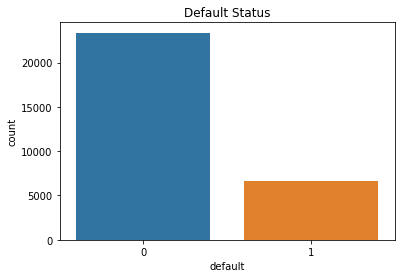

In [5]:
plt.title('Default Status')
sns.countplot(df.default);

The target data is skewed.

**Split into categorial/numerical features**

In [6]:
categorical = ['SEX', 'EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
numerical = list(set(df.columns)-set(categorical))
numerical = [x for x in numerical if x not in ['id','default']]

**Clean categorical features**
- Education: placed unkown categories 0,5,6 into 4(Others)
- Marriage: placed unkown category 0 into 3(Others)

In [7]:
df['EDUCATION'] = df['EDUCATION'].replace({0:4, 5:4, 6:4})
df['MARRIAGE'] = df['MARRIAGE'].replace({0:3})

In [8]:
df_catplot = df[['SEX','EDUCATION','MARRIAGE']]
df_catplot['SEX'].replace({1:'male', 2:'female'}, inplace=True)
df_catplot['EDUCATION'].replace({1:'graduate', 2:'university', 3:'highschool', 4:'others'}, inplace=True)
df_catplot['MARRIAGE'].replace({1:'married', 2:'single', 3:'others'}, inplace=True)

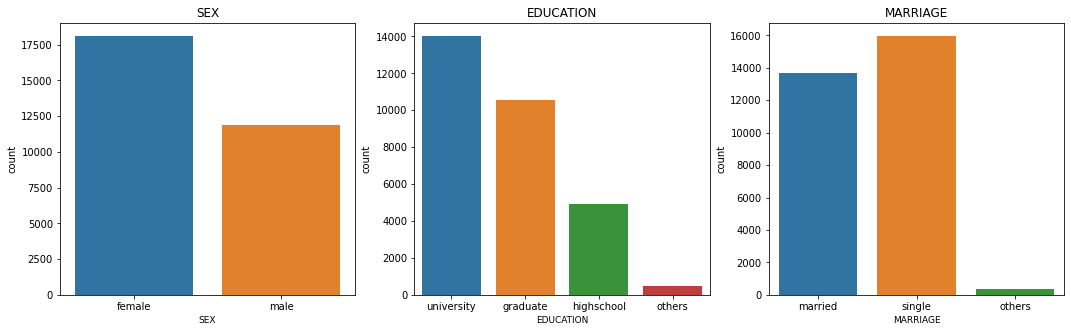

In [9]:
fig = plt.figure(figsize=(18,5))
for i, var in enumerate(['SEX','EDUCATION','MARRIAGE']):
    plt.subplot(1,3,i+1)
    plt.xlabel(var, fontsize=9)
    plt.title(var)
    sns.countplot(df_catplot[var])

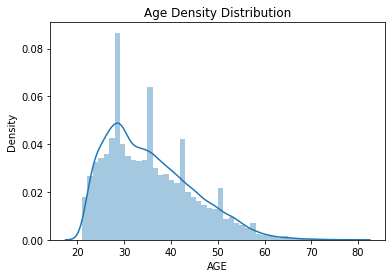

In [10]:
ax = sns.distplot(df.AGE)
ax.set_title('Age Density Distribution');

The population of the dataset is mainly young, college students.

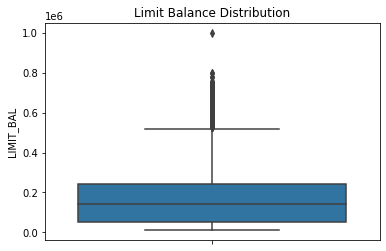

In [11]:
ax = sns.boxplot(y=df.LIMIT_BAL)
ax.set_title('Limit Balance Distribution');

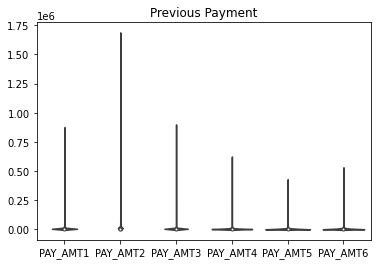

In [12]:
pay_amt = df[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]
ax = sns.violinplot(data=pay_amt)
ax.set_title('Previous Payment');

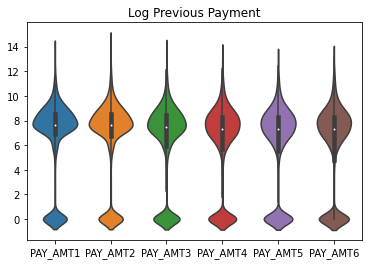

In [13]:
pay_amt_log = np.log(df[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]+1)
ax = sns.violinplot(data=pay_amt_log)
ax.set_title('Log Previous Payment');

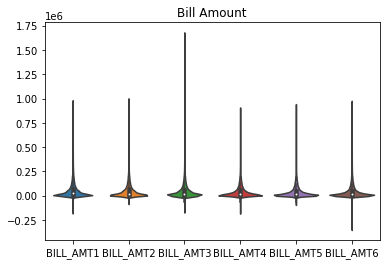

In [14]:
bill_amt = df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']]
ax = sns.violinplot(data=bill_amt)
ax.set_title('Bill Amount');

### 1.2 Bivariate Analysis <a class="anchor" id="1_2"></a>
**Categorical Features**

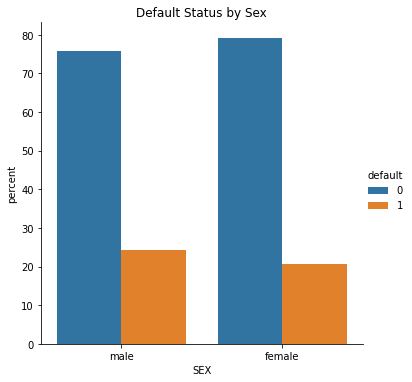

In [15]:
x,y = 'SEX', 'default'
ax = df.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar')
ax.set_xticklabels(['male', 'female'])
plt.title('Default Status by Sex');

Both sexes have similar default proportions.

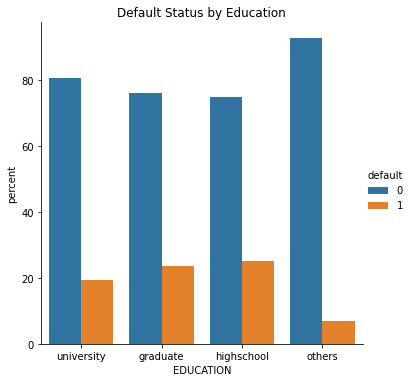

In [16]:
x,y = 'EDUCATION', 'default'
ax = df.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar')
ax.set_xticklabels(['university', 'graduate', 'highschool', 'others'])
plt.title('Default Status by Education');

Those with a highschool education were most likely to default and those in the 'others' category were least likely.

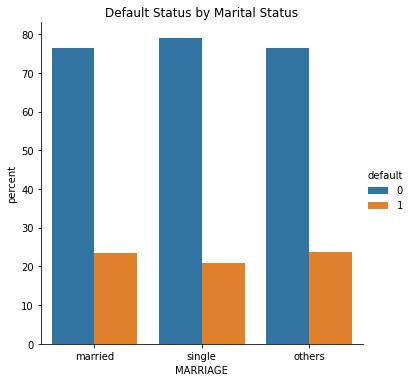

In [17]:
x,y = 'MARRIAGE', 'default'
ax = df.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar')
ax.set_xticklabels(['married', 'single', 'others'])
plt.title('Default Status by Marital Status');

There does not seem to be a significant correlation between default and marital status.

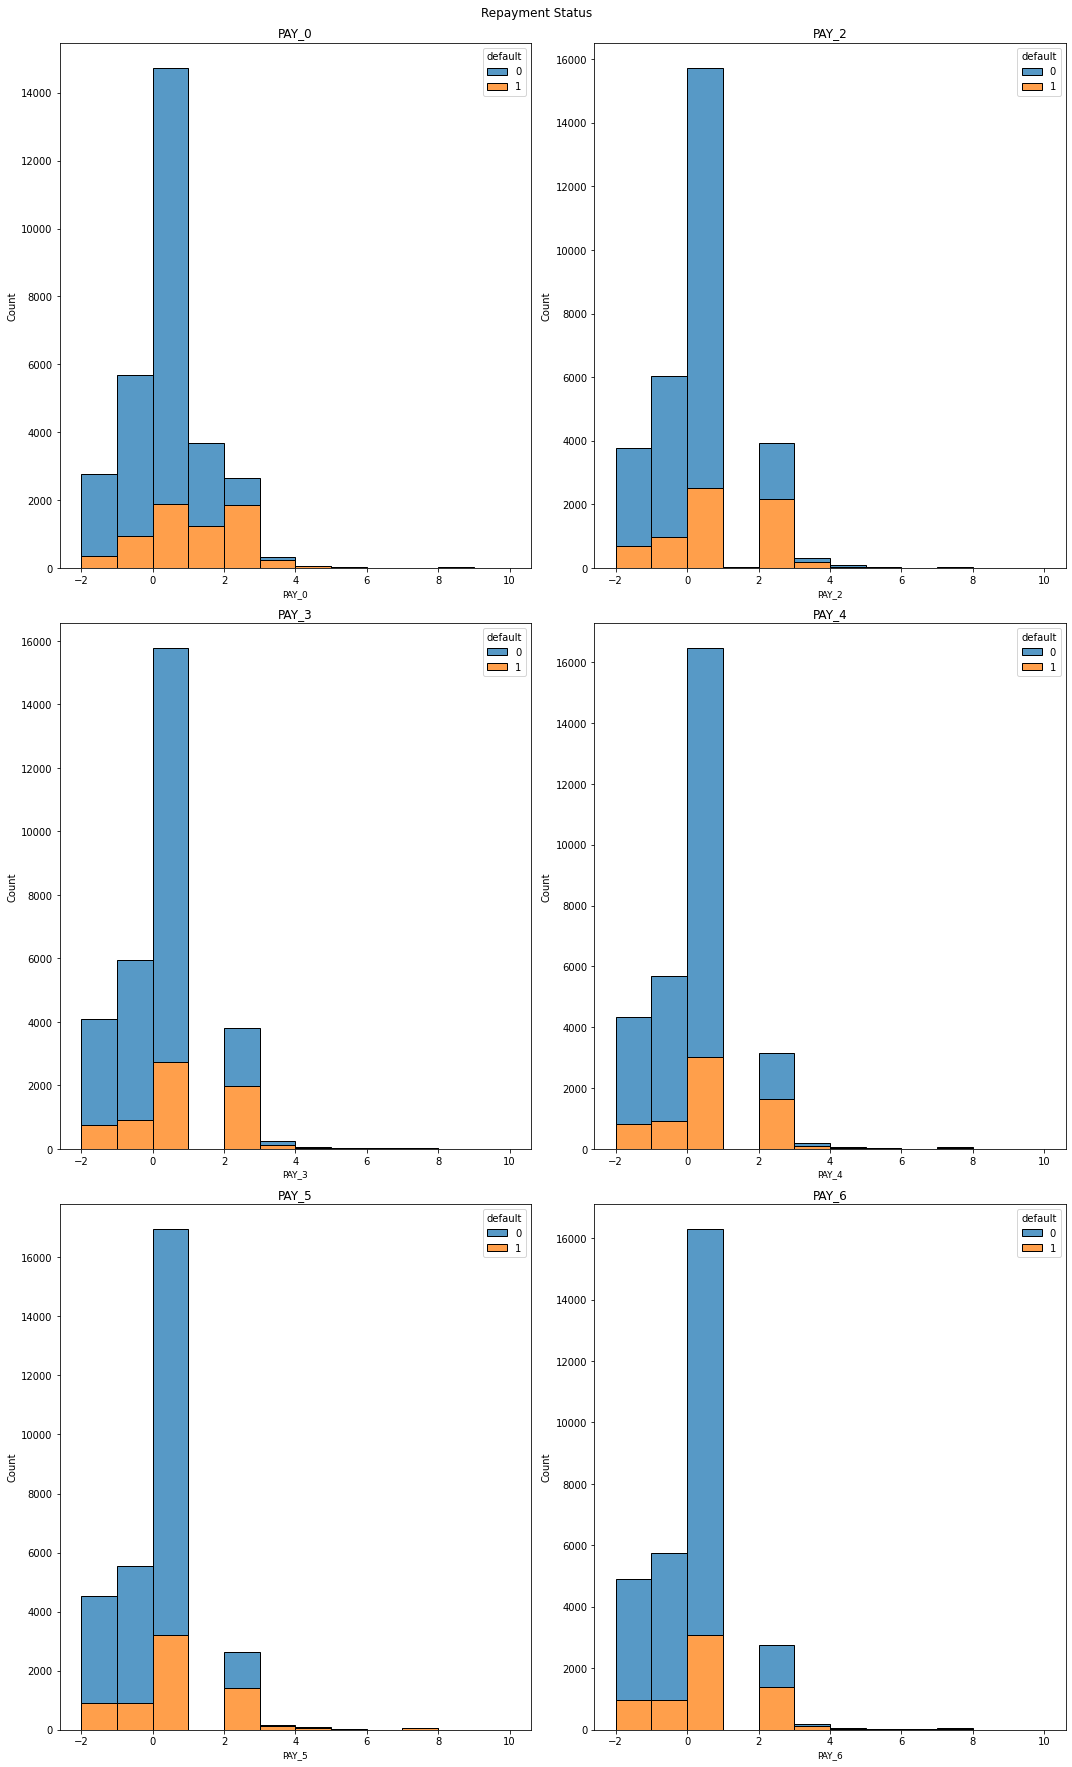

In [18]:
fig = plt.figure(figsize=(15,25))
for i, var in enumerate(['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']):
    plt.subplot(3,2,i+1)
    plt.xlabel(var, fontsize=9)
    plt.title(var)
    sns.histplot(data=df, x=var, hue="default", bins=np.linspace(-2, 10, num=13), multiple='stack')
fig.suptitle('Repayment Status')
plt.tight_layout()
plt.subplots_adjust(top=.96);

Those with late payments were significantly more likely to default.

**Continuous Features**

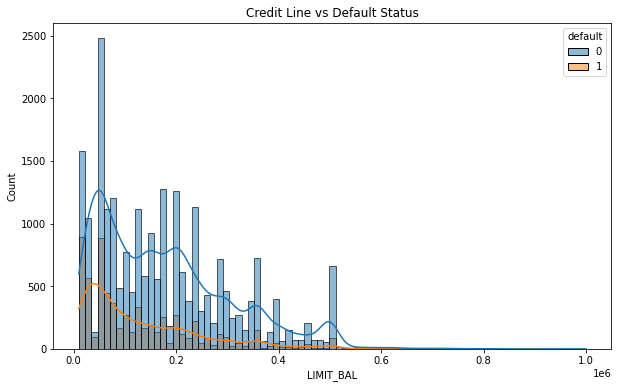

In [19]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='LIMIT_BAL', hue='default', kde=True)
plt.title('Credit Line vs Default Status');

The limit balance of accounts that did not default were higher.

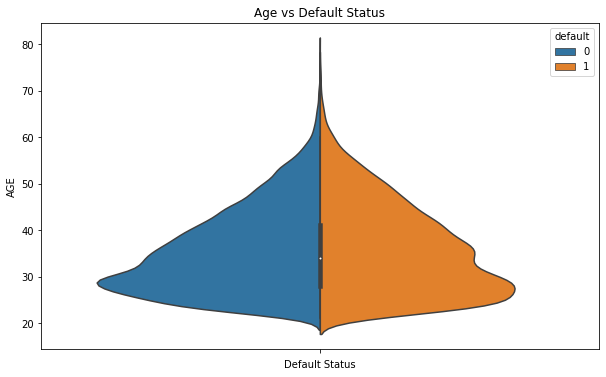

In [20]:
age = df[['AGE','default']]
age['Default Status'] = ''

plt.figure(figsize=(10,6))
sns.violinplot(data=age, x='Default Status', y='AGE', hue='default', kde=True, split=True)
plt.title('Age vs Default Status');

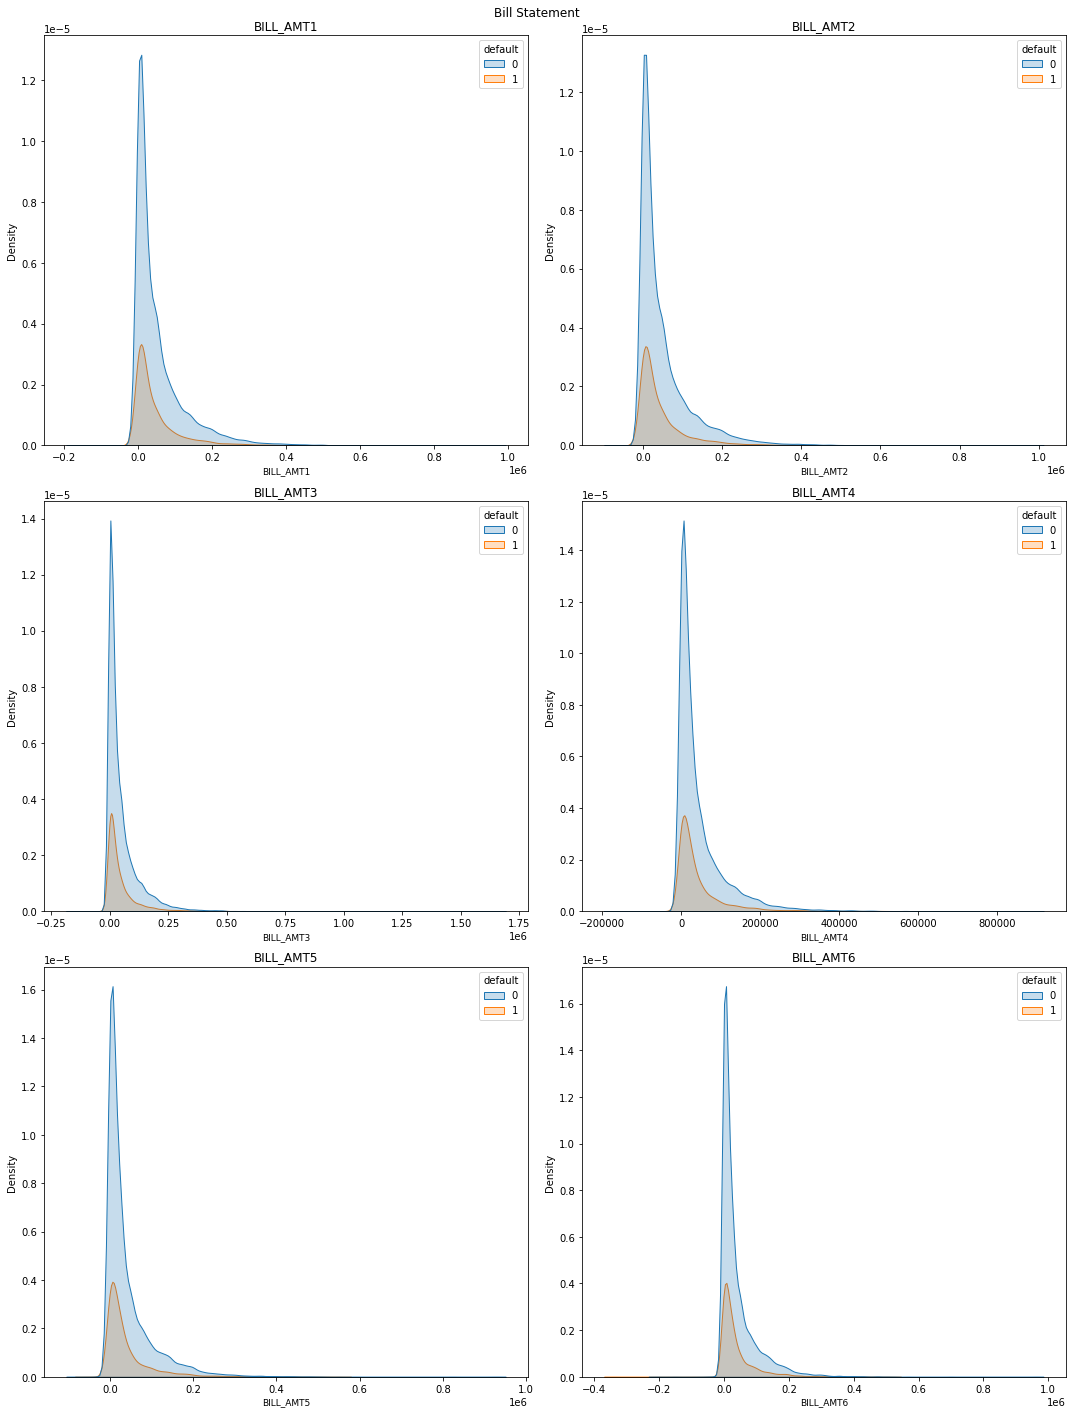

In [21]:
fig = plt.figure(figsize=(15,20))
for i, var in enumerate(['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']):
    plt.subplot(3,2,i+1)
    plt.xlabel(var, fontsize=9)
    plt.title(var)
    sns.kdeplot(data=df, x=var, hue="default", shade=True)
fig.suptitle('Bill Statement')
plt.tight_layout()
plt.subplots_adjust(top=.96);

### 1.3 Correlation Matrix <a class="anchor" id="1_3"></a>

In [22]:
corr = df.corr().abs()
mask = np.triu(np.ones_like(corr).astype(bool))

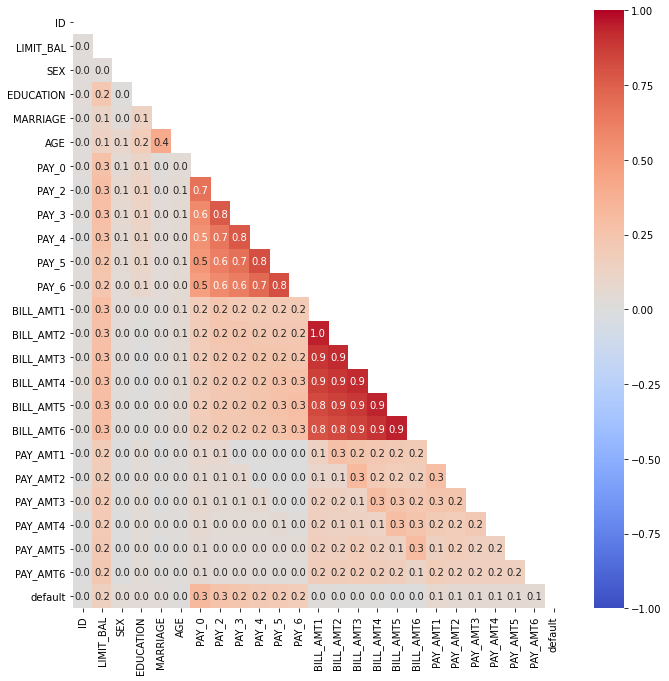

In [23]:
plt.subplots(figsize=(11, 11)) 
sns.heatmap(corr,mask=mask, vmax=1, vmin=-1,annot= True,fmt=".1f",cmap = 'coolwarm');

In [24]:
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
theshold = .90
high_corr = [c for c in upper.columns if any(upper[c]>theshold)]
high_corr

['BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

## 2 Feature Engineering <a class="anchor" id="2"></a>

### 2.1 Drop highly correlated columns <a class="anchor" id="2_1"></a>

In [25]:
df = df.drop(columns=high_corr)

### 2.2 Log Transformations <a class="anchor" id="2_2"></a>
- credit line, bill amount, previous amount

In [26]:
df['LIMIT_BAL_log'] = np.log(df['LIMIT_BAL'])
df.drop('LIMIT_BAL', axis=1, inplace=True)

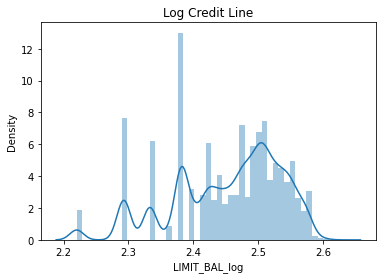

In [27]:
sns.distplot(np.log(df['LIMIT_BAL_log'])).set_title('Log Credit Line');

In [28]:
df_log = np.log(df[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]+1).rename(columns = {'PAY_AMT1':'PAY_AMT1_log','PAY_AMT2':'PAY_AMT2_log',
                   'PAY_AMT3':'PAY_AMT3_log','PAY_AMT4':'PAY_AMT4_log','PAY_AMT5':'PAY_AMT5_log','PAY_AMT6':'PAY_AMT6_log'})
df.drop(columns=['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4','PAY_AMT5', 'PAY_AMT6'], inplace=True)

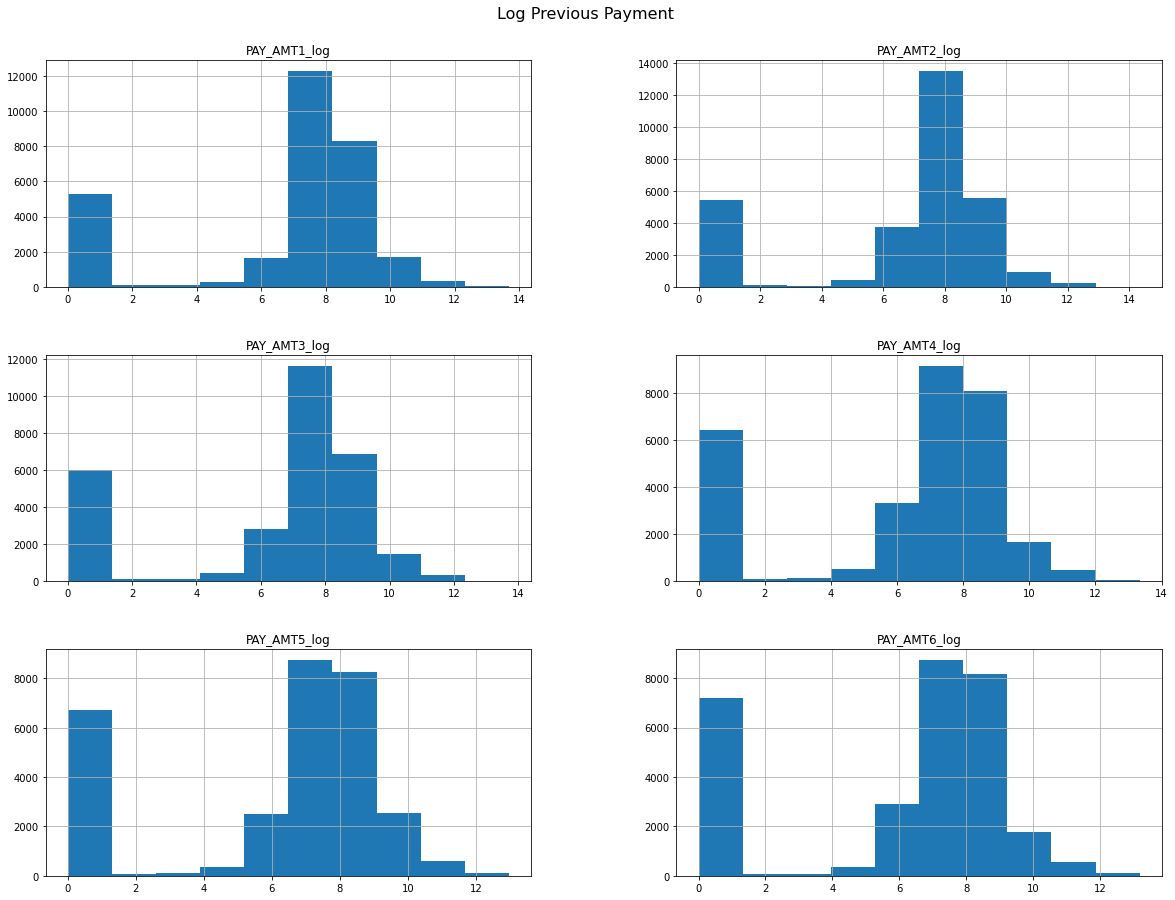

In [29]:
hist_num = df_log.hist(figsize=(20,15))
plt.suptitle('Log Previous Payment', y =.93, ha='center',fontsize=16);

In [30]:
df = pd.concat([df, df_log], axis=1)

### 2.3 Numerical to Categorial <a class="anchor" id="2_3"></a>
 - change payment to categories: no delay, delay

In [31]:
payments = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

In [32]:
payment_cat = pd.DataFrame()
for i in payments:
    df.loc[:,i] = df[i].apply(lambda x: 'No Delay' if x>0  else 'Delay')

### 2.4 One-hot encoding <a class="anchor" id="2_4"></a>

In [33]:
df[['SEX','EDUCATION','MARRIAGE']] = df[['SEX','EDUCATION','MARRIAGE']].astype('object')
df = pd.get_dummies(df)


## 3 Model Selection <a class="anchor" id="3"></a>

In [34]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, f1_score, recall_score,roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

### 3.1 SMOTE <a class="anchor" id="3_1"></a>

In [35]:
X = df.drop('default',axis=1)
y = df.default
sm = SMOTE()
X_res, y_res = sm.fit_resample(X, y)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_res, y_res, train_size=0.7)

### 3.2 Logistic Regression <a class="anchor" id="3_2"></a>

In [36]:
def model(clf):
    clf.fit(X_train,y_train)
    print('Train')
    y_pred = clf.predict(X_train)
    y_hat = clf.predict_proba(X_train)[:,1]
    print('precision: ',precision_score(y_train, y_pred))
    print('recall: ',recall_score(y_train, y_pred))
    print('f1-score: ',f1_score(y_train, y_pred))
    print('Test')
    y_pred = clf.predict(X_test)
    y_hat = clf.predict_proba(X_test)[:,1]
    print('precision: ',precision_score(y_test, y_pred))
    print('recall: ',recall_score(y_test, y_pred))
    print('f1-score: ',f1_score(y_test, y_pred))
    return y_hat


In [37]:
def roccurve(y_test, y_hat):
    auc = roc_auc_score(y_test, y_hat)
    fpr, tpr, thresholds = roc_curve(y_test, y_hat)
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

Train
precision:  0.5099385184743032
recall:  0.5197736675590168
f1-score:  0.5148091235047757
Test
precision:  0.5108285594522844
recall:  0.5277136258660509
f1-score:  0.5191338303159388


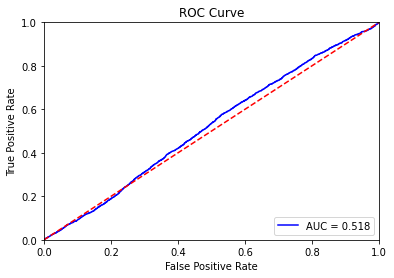

In [38]:
y_hat = model(LogisticRegression())
roccurve(y_test, y_hat)

### 3.3 Random Forest <a class="anchor" id="3_3"></a>

Train
precision:  1.0
recall:  1.0
f1-score:  1.0
Test
precision:  0.9140637387030284
recall:  0.8321304849884527
f1-score:  0.8711749149981111


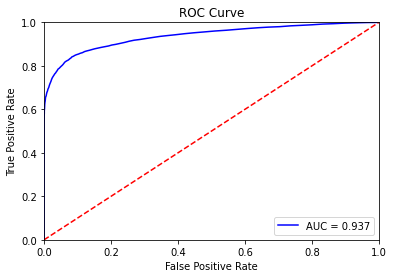

In [39]:
y_hat = model(RandomForestClassifier())
roccurve(y_test,y_hat)

### 3.4 GBM <a class="anchor" id="3_4"></a>

Train
precision:  0.927585235277543
recall:  0.8011681674373327
f1-score:  0.8597545050927135
Test
precision:  0.9279264214046823
recall:  0.8009526558891455
f1-score:  0.8597768825534553


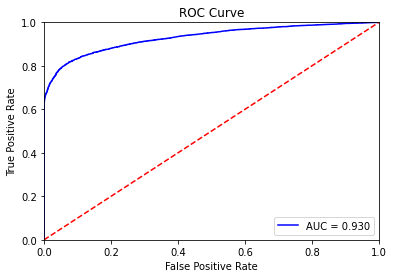

In [40]:
y_hat = model(GradientBoostingClassifier())
roccurve(y_test,y_hat)